In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
import cv2

import matplotlib.pyplot as plt

In [2]:
def extract_label(img_path):
    filename = os.path.splitext(os.path.basename(img_path))[0]

    info = filename.split('__')[1]
  
    gender = info.split('_')[0]
  
    gender = 0 if gender == 'M' else 1

    return np.array([gender], dtype=np.uint16)

In [3]:
img_size = 96

def loading_data(path):
    print("loading data from: ",path)
    data = []
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            img_resize = cv2.resize(img_array, (img_size, img_size))
            label = extract_label(os.path.join(path, img))
            data.append([label[0], img_resize ])
        except Exception as e:
            pass
    data
    return data

In [4]:
Real_path = "../data/SOCOFing/Real"
Easy_path = "../data/SOCOFing/Altered-Easy"
Medium_path = "../data/SOCOFing/Altered-Medium"
Hard_path = "../data/SOCOFing/Altered-Hard"


Easy_data = loading_data(Easy_path)
Medium_data = loading_data(Medium_path)
Hard_data = loading_data(Hard_path)
test = loading_data(Real_path)

data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)

del Easy_data, Medium_data, Hard_data

loading data from:  ../data/SOCOFing/Altered-Easy
loading data from:  ../data/SOCOFing/Altered-Medium
loading data from:  ../data/SOCOFing/Altered-Hard
loading data from:  ../data/SOCOFing/Real


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [5]:
data.shape

(49270, 2)

In [6]:
data[120]

array([0, array([[160, 158, 158, ...,   0,   0,   0],
                 [160, 105, 121, ...,   0,   0,   0],
                 [160, 105, 255, ...,   0,   0,   0],
                 ...,
                 [  0,   0,   0, ...,   0,   0,   0],
                 [  0,   0,   0, ...,   0,   0,   0],
                 [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)],
      dtype=object)

In [7]:
img, labels = [], []
for label, feature in data:
    labels.append(label)
    img.append(feature)
print(np.shape(img))
train_data = np.array(img) / 255.0
train_labels = np.zeros((len(labels),2))
for i in range(len(labels)):
    if labels[i]==1:
        train_labels[i,0] = 1
    else:
        train_labels[i,1] = 1


(49270, 96, 96)


In [8]:
train_data.shape

(49270, 96, 96)

In [43]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    tf.keras.Input(shape=([96, 96, 1])),
                    Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(2, activation = 'sigmoid'),
                    ])

In [44]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 96, 96, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       9,437,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,437,890 (36.00 MB)

 Trainable params: 9,437,890 (36.00 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(optimizer = optimizers.Adam(1e-3), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [46]:
istory = model.fit(train_data, train_labels, batch_size = 128, epochs = 15, 
          validation_split = 0.2, verbose = 1)

Epoch 1/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 56s 176ms/step - accuracy: 0.7371 - loss: 4.5074 - val_accuracy: 0.8142 - val_loss: 0.4041
Epoch 2/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 53s 171ms/step - accuracy: 0.7934 - loss: 0.4285 - val_accuracy: 0.8142 - val_loss: 0.5164
Epoch 3/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 52s 170ms/step - accuracy: 0.7971 - loss: 0.3820 - val_accuracy: 0.8694 - val_loss: 0.3502
Epoch 4/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 52s 170ms/step - accuracy: 0.8859 - loss: 0.2740 - val_accuracy: 0.8794 - val_loss: 0.3268
Epoch 5/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 52s 169ms/step - accuracy: 0.9056 - loss: 0.2405 - val_accuracy: 0.8949 - val_loss: 0.2801
Epoch 6/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 52s 170ms/step - accuracy: 0.9445 - loss: 0.1723 - val_accuracy: 0.9489 - val_loss: 0.1574
Epoch 7/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 53s 173ms/step - accuracy: 0.9633 - loss: 0.1338 - val_accuracy: 0.9597 - val_loss: 0.1316
Epoch 8/15
308/308 ━━━━━━━━━━━━━━━━━━━━ 56s 182ms/step - accuracy: 0.9732 - loss: 0

In [47]:
his = pd.DataFrame(istory.history)
loss_array = np.array(his['loss'])
val_loss_array = np.array(his['val_loss'])


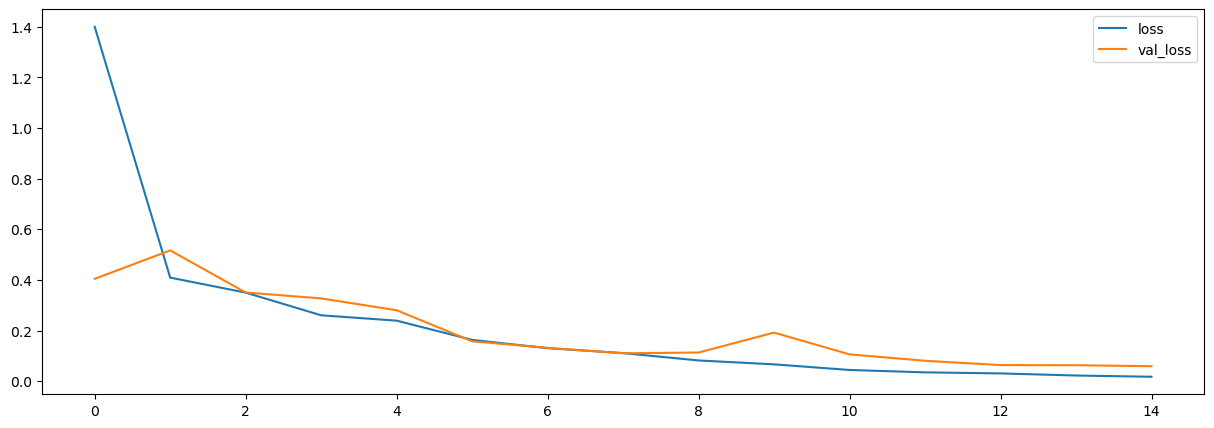

In [48]:
fig,axs = plt.subplots(1,1,figsize=(15,5))
axs.plot(np.arange(15),loss_array,label = 'loss')
axs.plot(np.arange(15),val_loss_array,label = 'val_loss')
axs.legend(loc=1)

In [49]:
test_images, test_label = [], []

for label, feature in test:
    test_images.append(feature)
    test_label.append(label)
    
test_images = np.array(test_images) / 255.0

test_labels = np.zeros((len(test_label),2))
for i in range(len(test_label)):
    if test_label[i]==1:
        test_labels[i,0] = 1
    else:
        test_labels[i,1] = 1

In [50]:
model.evaluate(test_images, test_labels)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9995 - loss: 0.0139


[0.015320447273552418, 0.9988333582878113]

In [51]:
model.predict(test_images[150:160])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979],
       [0.8125702 , 0.18742979]], dtype=float32)

In [52]:
test_labels[150:160]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])